In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# fig = plt.figure()


# def f(x, y):
#     return np.sin(x) + np.cos(y)

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# # ims is a list of lists, each row is a list of artists to draw in the
# # current frame; here we are just animating one artist, the image, in
# # each frame
# ims = []
# for i in range(60):
#     x += np.pi / 15.
#     y += np.pi / 20.
#     im = plt.imshow(f(x, y), animated=True)
#     ims.append([im])

# ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
#                                 repeat_delay=1000)

# ani.save('dynamic_images.mp4')

# plt.show()

In [15]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
import netCDF4 as nc
import numpy as np

from matplotlib import cm
from matplotlib import colors
import matplotlib.animation as animation

In [3]:
base = io.imread('shadedrelief_w_borders_and_mask_gray.tif')
base.shape

(3850, 7700)

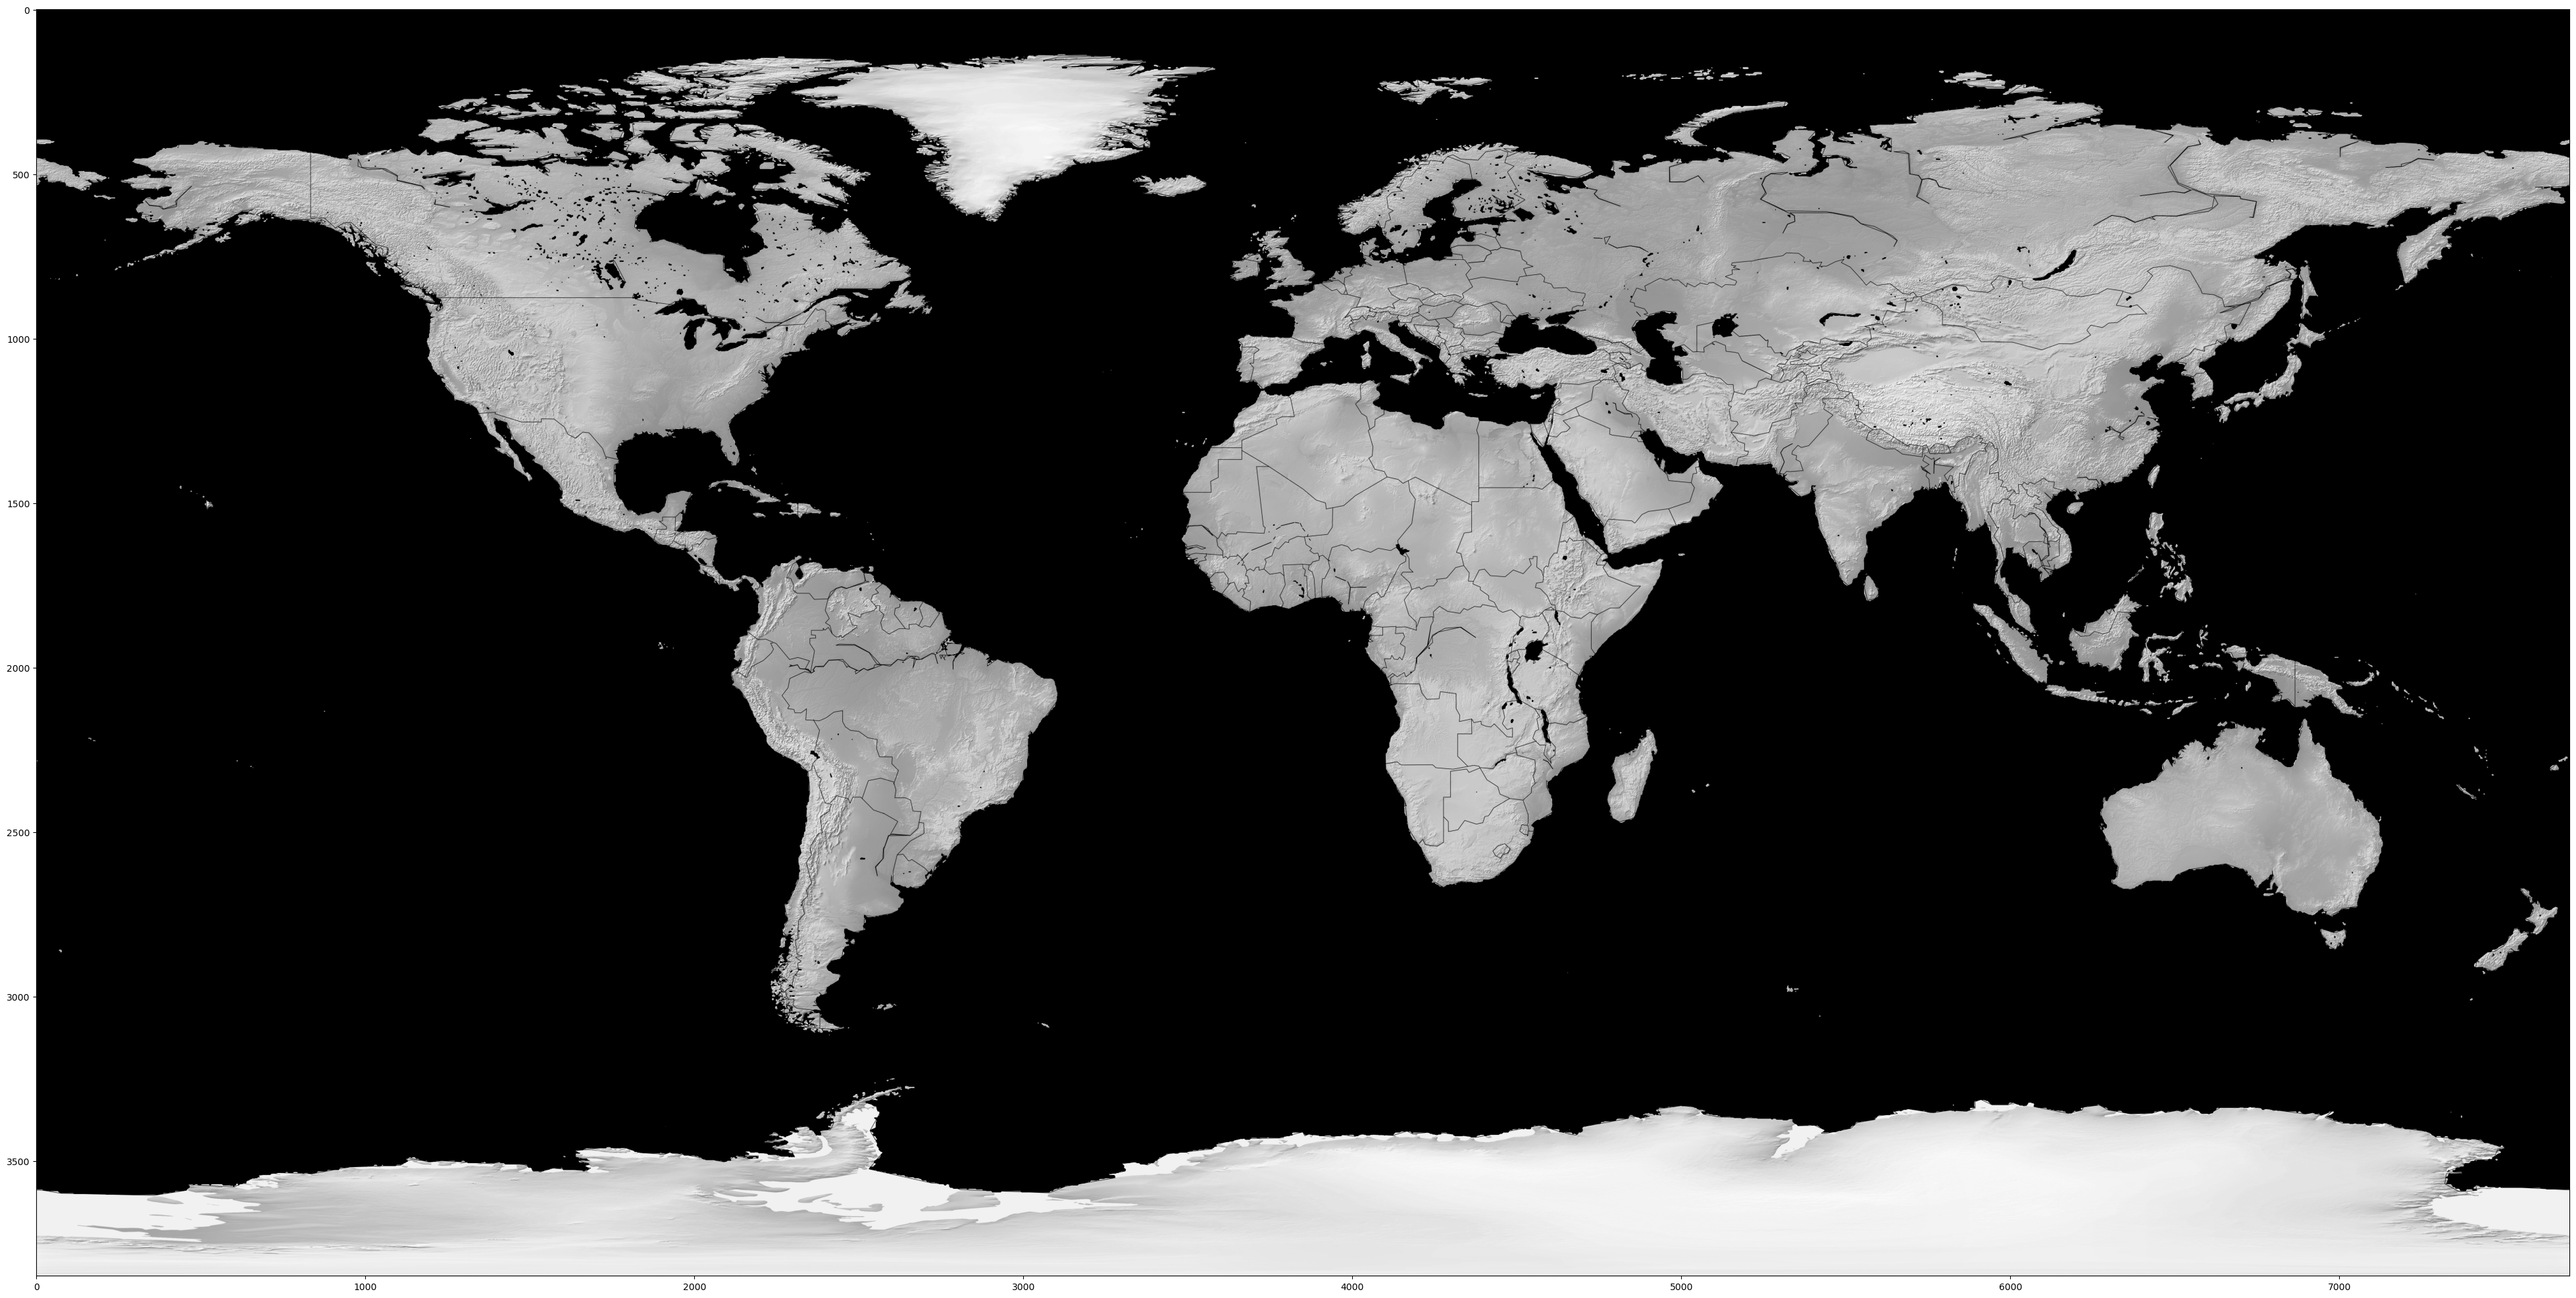

In [4]:
plt.figure(figsize=(50,25))
plt.imshow(base, cmap='gray')

In [5]:
ds = nc.Dataset('../../UFZ_RemoteSensing/HOLAPS-H-JJA_anomaly-d-2001-2005.nc')
data = np.flip(ds["surface_upward_sensible_heat_flux"][0], axis=0)
lat_arr = ds['latitude'][:]
long_arr = ds['longitude'][:]
time_arr = ds['time'][:]
data.shape

(601, 1233)

In [6]:
def find_idx_nearest_val(arr, val):
    return (np.abs(arr - val)).argmin()

loc_lat = np.linspace(-90, 90, base.shape[0])
loc_long = np.linspace(-180, 180, base.shape[1])

min_lat = np.min(lat_arr)
max_lat = np.max(lat_arr)
min_long = np.min(long_arr)
max_long = np.max(long_arr)

world_max_lat_idx = find_idx_nearest_val(-loc_lat, min_lat)
world_min_lat_idx = find_idx_nearest_val(-loc_lat, max_lat)

world_min_long_idx = find_idx_nearest_val(loc_long, min_long)
world_max_long_idx = find_idx_nearest_val(loc_long, max_long)

world_min_lat_idx, world_max_lat_idx, world_min_long_idx, world_max_long_idx

(641, 1283, 3529, 4854)

In [7]:
base = base[world_min_lat_idx:world_max_lat_idx, world_min_long_idx:world_max_long_idx]

(-0.5, 1324.5, 641.5, -0.5)

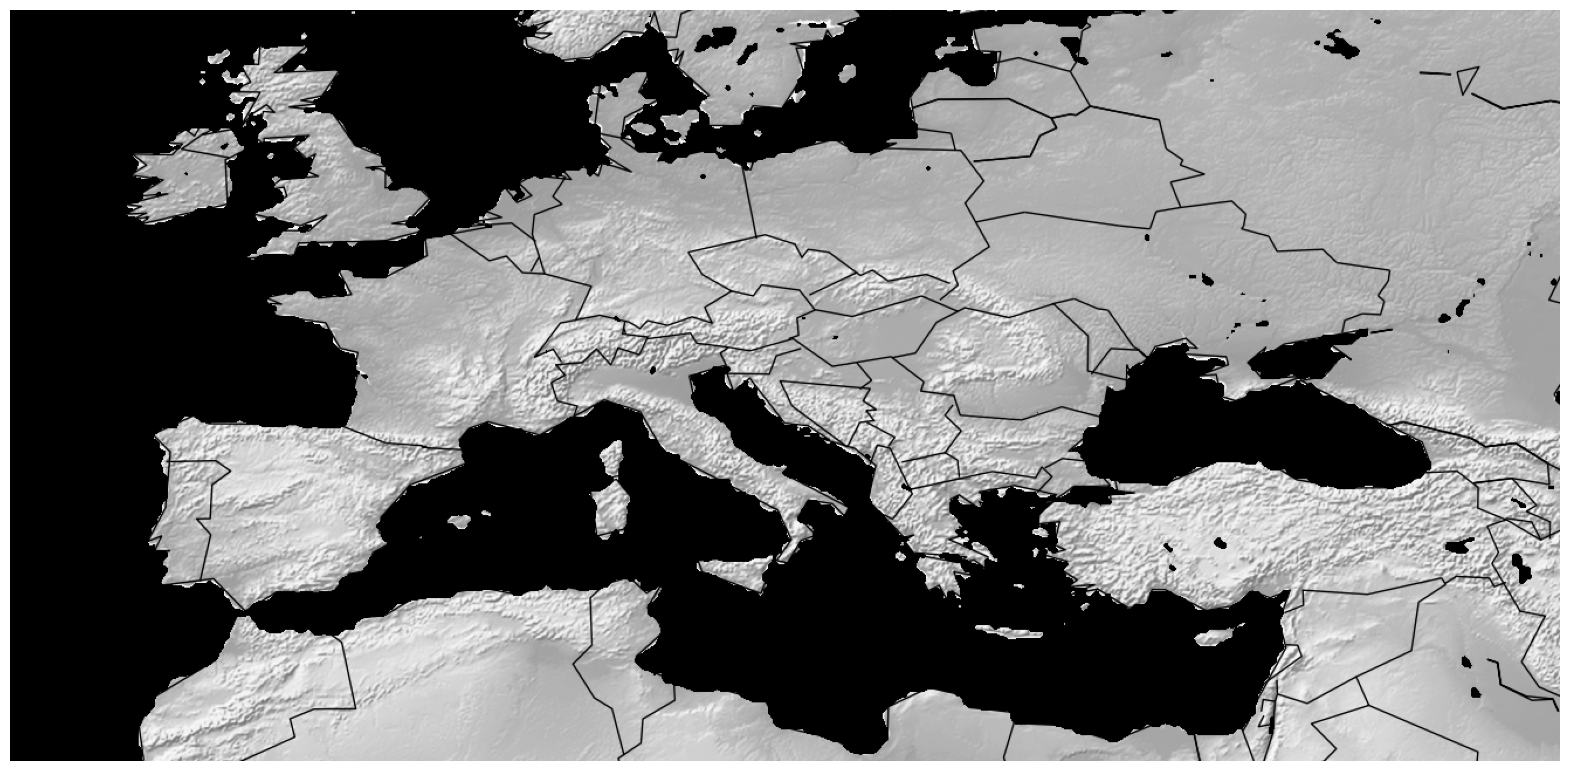

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(base, cmap='gray')
plt.axis('off')

In [9]:
min_val = np.min(data)
max_val = np.max(data)
min_val, max_val

(-111.63459, 119.272026)

In [10]:
data = cv2.resize(data, base.shape[::-1], interpolation=cv2.INTER_NEAREST)

In [11]:
base[data<-1000] = 0

In [12]:
data = data - min_val + 1
data[data==np.min(data)] = 0
data = data.astype(np.uint8)

In [28]:
colmap = cm.get_cmap('jet')
if isinstance(colmap, colors.LinearSegmentedColormap):
    colmap = (colmap(np.arange(0,colmap.N))*np.asarray([255,255,255,0.5*255]).astype(np.uint8))

mid = colmap.shape[0]//2

for i in range(1,mid):
    colmap[i,3] = 255-i*2
    colmap[colmap.shape[0]-i,3] = 255-i*2
    
colmap[0] = [255,255,255,0]

result = np.zeros((*data.shape,4), dtype=np.uint8)

data_w_cmap = np.take(colmap, data, axis=0, out=result)

(-0.5, 1324.5, 641.5, -0.5)

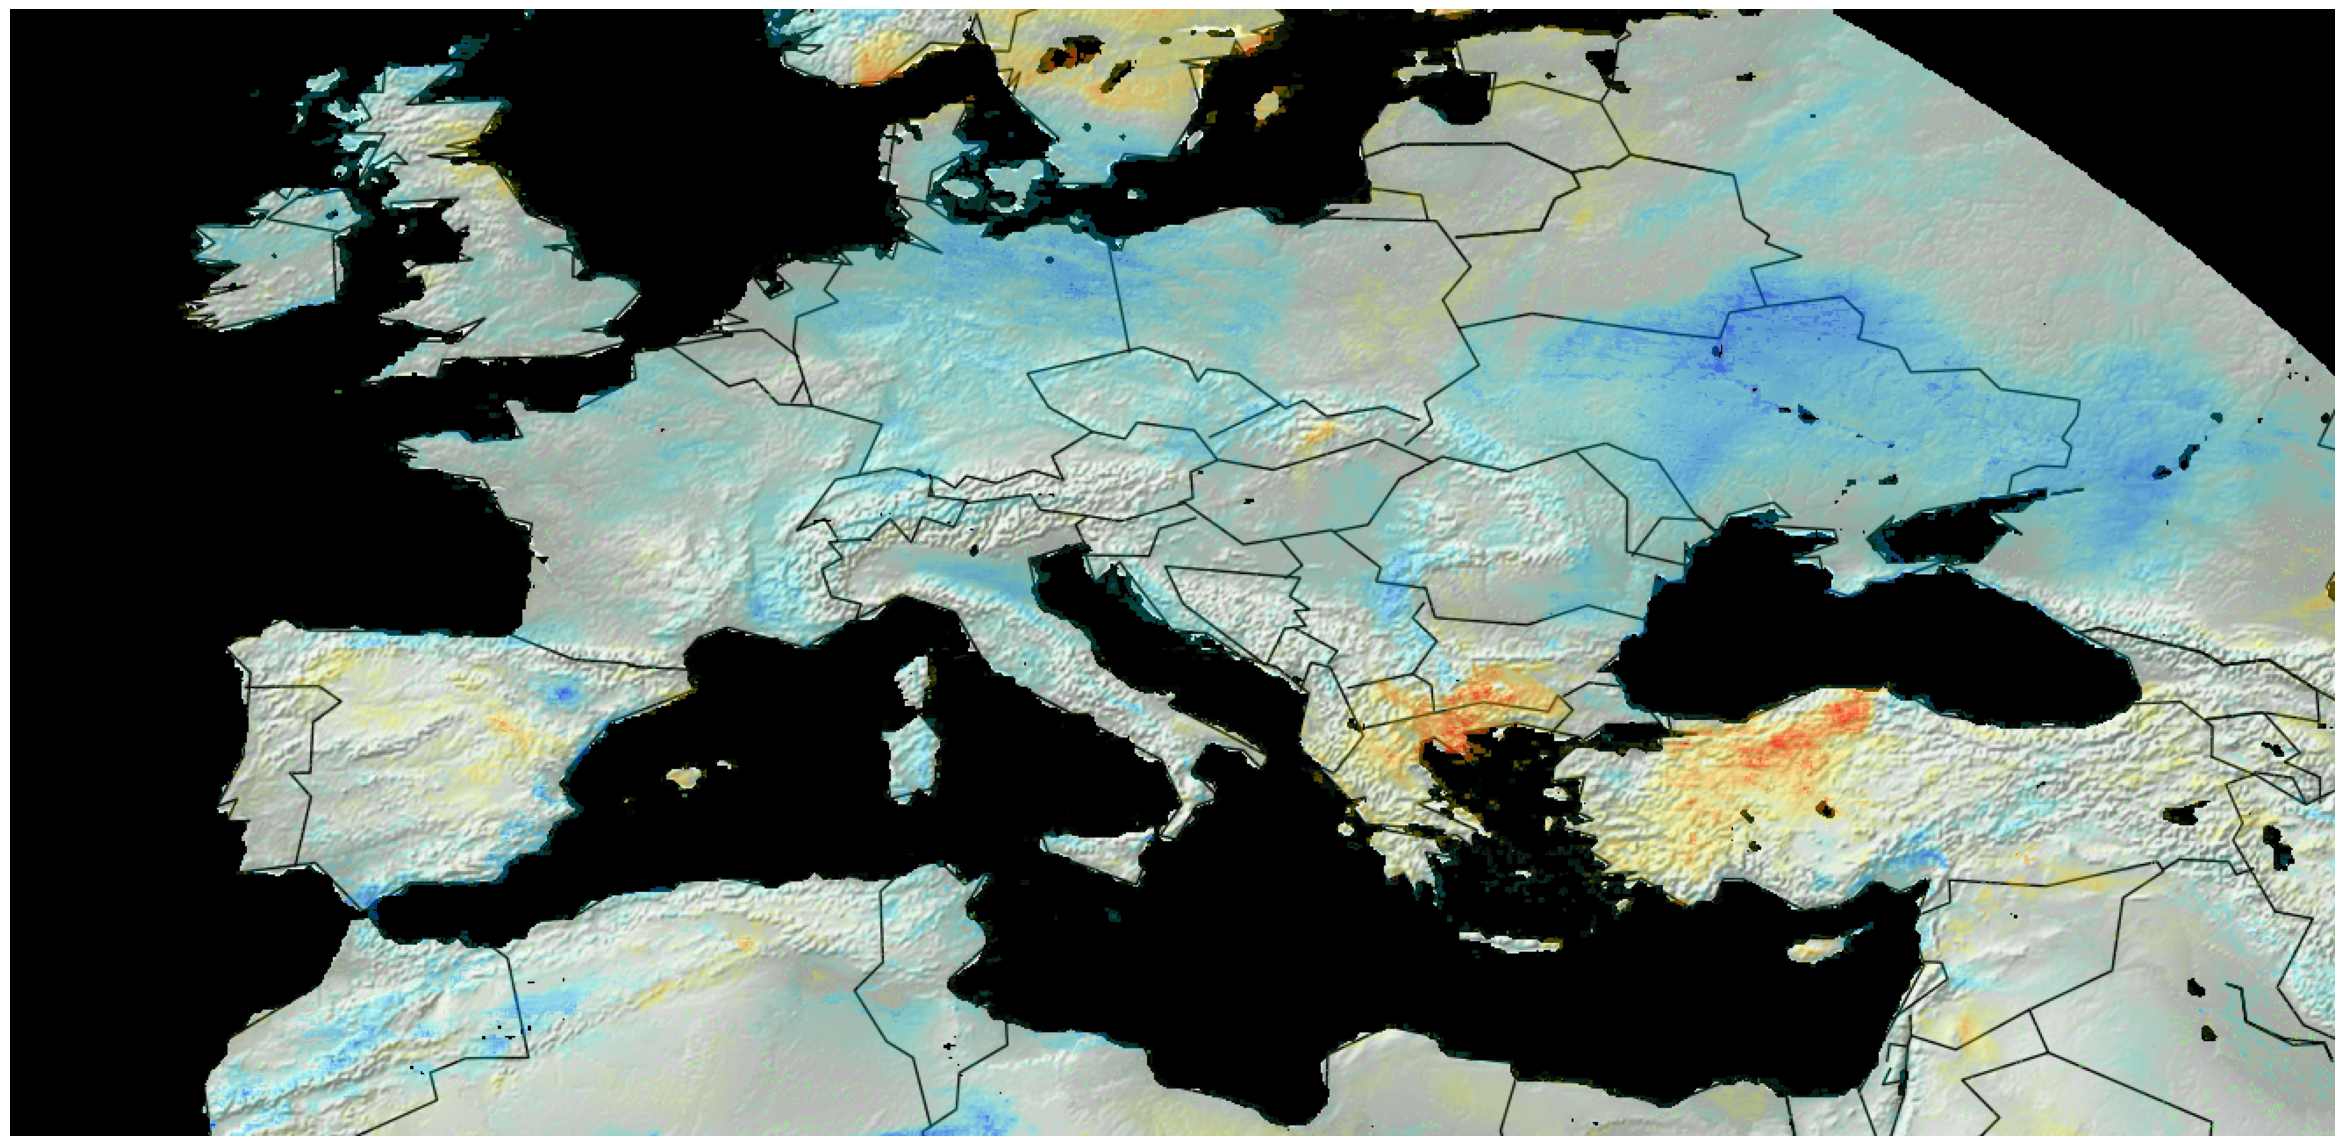

In [29]:
fig = plt.figure(figsize=(30, 15))

plt.imshow(base, cmap='gray')
plt.imshow(data_w_cmap)
plt.axis('off')

In [40]:
for i in range(100):
    data = np.flip(ds["surface_upward_sensible_heat_flux"][i], axis=0)
    data = cv2.resize(data, base.shape[::-1], interpolation=cv2.INTER_NEAREST)
    data = data - min_val + 1
    data[data==np.min(data)] = 0
    data = data.astype(np.uint8)
    data_w_cmap = np.take(colmap, data, axis=0, out=result)
    
    fig = plt.figure(figsize=(30, 15))

    plt.gca().set_axis_off()
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.imshow(base, cmap='gray')
    plt.imshow(data_w_cmap)
    plt.axis('off')

    plt.savefig(f'plt_imgs/test_plt{i}.jpg', bbox_inches='tight', pad_inches=0)

    plt.close(fig)

In [50]:
base.shape[0]/base.shape[1]

0.48452830188679247

In [ ]:
#fig = plt.figure()
fig = plt.figure(frameon=False)
plt.gca().set_axis_off()
# plt.margins(0,0)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.set_size_inches(10, 5, forward=True)
#fig.set_size_inches(w,h)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    img = io.imread(f'plt_imgs/test_plt{i}.jpg')
    im = plt.imshow(img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000,)

ani.save('dynamic_images.mp4', savefig_kwargs={"pad_inches":0})

plt.show()